In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue Aug  1 16:58:14 2023

@author: User
"""

from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, e, m_e, h
import numpy as np
import sympy as sp

X, Z = sp.symbols('X Z')

phi_0 = 0.5
wavelength = h/(2*abs(e)*m_e*phi_0)**(1/2)/1e-6

V = 0.1
r = 0.125e-6/1e-6
R = 1e-5/1e-6

phi = (1+V*(sp.log((X*X+(Z)**2)/(R**2)))/(2*sp.log(r/R))/phi_0)**(0.5)

n = str(phi).replace("log", "sp.log")





In [8]:
phi.simplify()
print(n)

(1 - 0.0228204911418669*(0.01*X**2 + 0.01*Z**2))**0.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Time = 52.81 s, time/loop = 51.57 ms


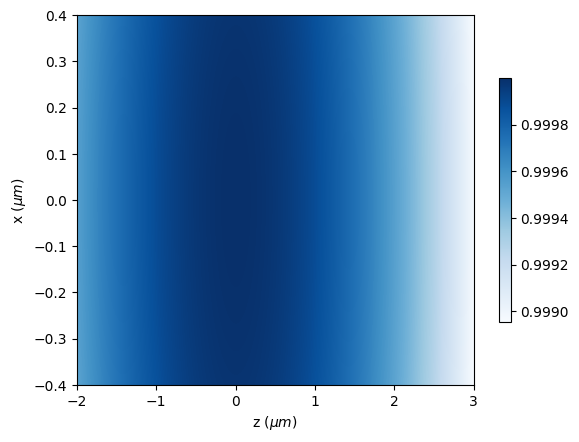

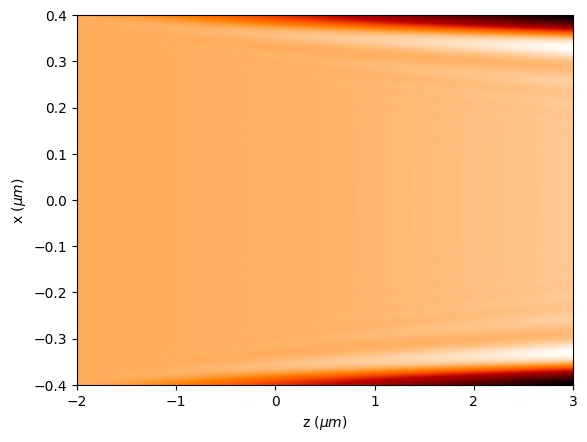

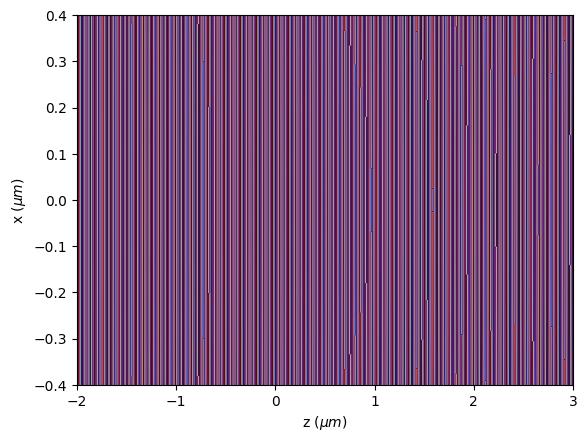

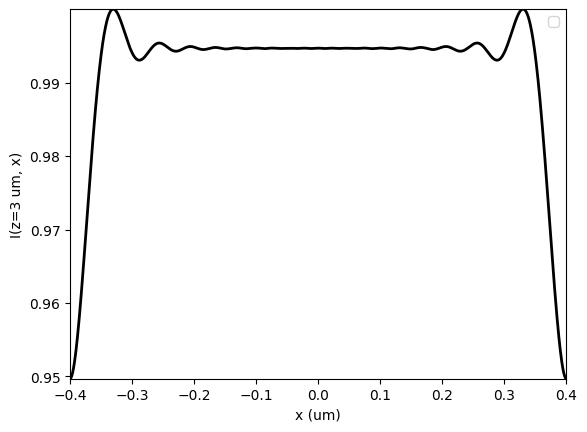

In [10]:
x0 = np.linspace(-0.4 * um, 0.4 * um, 1024 * 1)
z0 = np.linspace(-2 * um, 3 * um, 1024 * 1)

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, z0=0 * um, theta=0. * degrees)

t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)
t0.incident_field(u0)

t0.sphere(r0=(0, 0),
             radius=(R * um, R * um),
             refraction_index=n,
             angle=0 * degrees)

t0.sphere(r0=(0, 0),
             radius=(r * um, r * um),
             refraction_index=1 + 10j,
             angle=0 * degrees)

t0.draw_refraction_index(draw_borders=True, colorbar_kind='vertical')

t0.WPM(verbose=True, has_edges=False)
t0.draw(kind='intensity', draw_borders=True)
t0.draw(kind='phase', draw_borders=True)

u_field_last_plane = t0.profile_transversal(z0= 3 * um, normalize = 'maximum')
plt.xlim(-0.4 * um, 0.4 * um)
plt.legend()

